# Project 1

## Step 1: Load the data and perform basic operations.

In [199]:
#imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import math

##### 1. Load the data in using pandas.

In [200]:
#loading CSVs
satcsv=pd.read_csv('../data/sat.csv')
actcsv=pd.read_csv('../data/act.csv')
#converting to DataFrame
sat_df=DataFrame(satcsv)
act_df=DataFrame(actcsv)

##### 2. Print the first ten rows of each dataframe.

In [201]:
#printing rows
print('SAT DATA')
sat_10=sat_df.head(10)
print(sat_10,'\n')
print('ACT DATA')
act_10=act_df.head(10)
print(act_10)

SAT DATA
   Unnamed: 0                 State Participation  \
0           0               Alabama            5%   
1           1                Alaska           38%   
2           2               Arizona           30%   
3           3              Arkansas            3%   
4           4            California           53%   
5           5              Colorado           11%   
6           6           Connecticut          100%   
7           7              Delaware          100%   
8           8  District of Columbia          100%   
9           9               Florida           83%   

   Evidence-Based Reading and Writing  Math  Total  
0                                 593   572   1165  
1                                 547   533   1080  
2                                 563   553   1116  
3                                 614   594   1208  
4                                 531   524   1055  
5                                 606   595   1201  
6                                 53

##### 3. Describe in words what each variable (column) is.

Each column name specifies a series of data in the column below it

##### 4. Does the data look complete? Are there any obvious issues with the observations?

The Unnamed: 0 column is an index of all the data which already exists by the nature of Data Frame construction using the DataFrame() method. We have to remove it.

##### 5. Print the types of each column.

In [202]:
#Printing types
print('SAT','\n',sat_df.dtypes,'\n')
print('ACT','\n',act_df.dtypes)

SAT 
 Unnamed: 0                             int64
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object 

ACT 
 Unnamed: 0         int64
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [203]:
#We must reassign Participation because the percent sign is converting the data to an object instead of an int or float

sat_df['Participation']=sat_df['Participation'].map(lambda x: x.replace('%',''))
sat_df['Participation']=sat_df['Participation'].astype(int)
act_df['Participation']=act_df['Participation'].map(lambda x: x.replace('%',''))
act_df['Participation']=act_df['Participation'].astype(float)

In [204]:
#Making sure types are correct
act_df.dtypes

Unnamed: 0         int64
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [205]:
#removing unnecessary index column
sat_df.drop('Unnamed: 0',axis=1,inplace=True)
act_df.drop('Unnamed: 0',axis=1,inplace=True)
act_df.drop(0,axis=0,inplace=True)

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [206]:
#creating a list of dictionaries for each score value with K:V being State:Value
satdict=[]
for i in sat_df.columns[2:]:
    ser=Series(sat_df[i].values, index= sat_df['State']).to_dict()
    satdict.append(ser)

actdict=[]
for i in act_df.columns[2:]:
    ser=Series(act_df[i].values, index= act_df['State']).to_dict()
    actdict.append(ser)
    
#testing to see if the dictionaries are correct
print('SAT Math\n',satdict[1],'\n','\n','ACT Math\n',actdict[1])

SAT Math
 {'Alabama': 572, 'Alaska': 533, 'Arizona': 553, 'Arkansas': 594, 'California': 524, 'Colorado': 595, 'Connecticut': 512, 'Delaware': 492, 'District of Columbia': 468, 'Florida': 497, 'Georgia': 515, 'Hawaii': 541, 'Idaho': 493, 'Illinois': 556, 'Indiana': 532, 'Iowa': 635, 'Kansas': 628, 'Kentucky': 616, 'Louisiana': 586, 'Maine': 499, 'Maryland': 52, 'Massachusetts': 551, 'Michigan': 495, 'Minnesota': 651, 'Mississippi': 607, 'Missouri': 631, 'Montana': 591, 'Nebraska': 625, 'Nevada': 553, 'New Hampshire': 520, 'New Jersey': 526, 'New Mexico': 561, 'New York': 523, 'North Carolina': 535, 'North Dakota': 621, 'Ohio': 570, 'Oklahoma': 517, 'Oregon': 548, 'Pennsylvania': 531, 'Rhode Island': 524, 'South Carolina': 521, 'South Dakota': 603, 'Tennessee': 604, 'Texas': 507, 'Utah': 614, 'Vermont': 551, 'Virginia': 541, 'Washington': 534, 'West Virginia': 528, 'Wisconsin': 649, 'Wyoming': 604} 
 
 ACT Math
 {'Alabama': 18.4, 'Alaska': 19.8, 'Arizona': 19.8, 'Arkansas': 19.0, 'Calif

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [207]:
#Creating column dictionary
satcols=sat_df.columns
sat_col_index=dict(zip(list(satcols),list(range(len(satcols)))))

actcols=act_df.columns
act_col_index=dict(zip(list(actcols),list(range(len(actcols)))))
print('SAT: ',sat_col_index,'\n'
      'ACT: ',act_col_index)

SAT:  {'State': 0, 'Participation': 1, 'Evidence-Based Reading and Writing': 2, 'Math': 3, 'Total': 4} 
ACT:  {'State': 0, 'Participation': 1, 'English': 2, 'Math': 3, 'Reading': 4, 'Science': 5, 'Composite': 6}


##### 9. Merge the dataframes on the state column.

In [208]:
#Merging SAT data with ACT data

stnd_test=pd.merge(sat_df,act_df,on='State',suffixes=('_SAT','_ACT'))

#testing if the merge worked how we wanted
stnd_test.head(5)

,State,Participation_SAT,Evidence-Based Reading and Writing,Math_SAT,Total,Participation_ACT,English,Math_ACT,Reading,Science,Composite
0,Alabama,5,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

As seen in the head display above, this can be done with the "suffixes" parameter within the merge function in pandas, eliminiating another step that may have been needed to accomplish this task.

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [209]:
stnd_test['Participation_ACT'].max()

100.0

In [210]:
#Creating a dataframe of the maxes and mins to print out more nicely
test_minmax={}
for i in list(stnd_test.columns)[1:]:
    mx=stnd_test[i].max()
    mn=stnd_test[i].min()
    test_minmax[i]=[mx,mn]
min_max=DataFrame(test_minmax)
min_max.index=['Maximum','Minimum']
min_max

,Participation_SAT,Evidence-Based Reading and Writing,Math_SAT,Total,Participation_ACT,English,Math_ACT,Reading,Science,Composite
Maximum,100,644,651,1295,100.0,25.5,25.3,26.0,24.9,25.5
Minimum,2,482,52,950,8.0,16.3,18.0,18.1,2.3,17.8


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [211]:
#defining the function
def standard_dev(vals,mu,n):
    tosumm=[((i-mu)**2) for i in vals]
    return np.sqrt((1/n)*sum(tosumm))

stdd=[standard_dev(list(stnd_test[i]),np.average(stnd_test[i]),len(stnd_test[i]))for i in list(stnd_test.columns)[1:]]
sd=[np.nan]+stdd

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [212]:
#Add sd to data columns and 'Standard Deviation' to index
stnd_test.loc[51]=sd
new_ind=['Standard Deviation' if i==51 else i for i in stnd_test.index]
stnd_test.index=new_ind
stnd_test

,State,Participation_SAT,Evidence-Based Reading and Writing,Math_SAT,Total,Participation_ACT,English,Math_ACT,Reading,Science,Composite
0,Alabama,5.000000,593.00000,572.000000,1165.000000,100.000000,18.900000,18.400000,19.700000,19.400000,19.200000
1,Alaska,38.000000,547.00000,533.000000,1080.000000,65.000000,18.700000,19.800000,20.400000,19.900000,19.800000
2,Arizona,30.000000,563.00000,553.000000,1116.000000,62.000000,18.600000,19.800000,20.100000,19.800000,19.700000
3,Arkansas,3.000000,614.00000,594.000000,1208.000000,100.000000,18.900000,19.000000,19.700000,19.500000,19.400000
4,California,53.000000,531.00000,524.000000,1055.000000,31.000000,22.500000,22.700000,23.100000,22.200000,22.800000
5,Colorado,11.000000,606.00000,595.000000,1201.000000,100.000000,20.100000,20.300000,21.200000,20.900000,20.800000
6,Connecticut,100.000000,530.00000,512.000000,1041.000000,31.000000,25.500000,24.600000,25.600000,24.600000,25.200000
7,Delaware,100.000000,503.00000,492.000000,996.000000,18.000000,24.100000,23.400000,24.800000,23.600000,24.100000
8,District of Columbia,100.000000,482.00000,468.000000,950.000000,32.000000,24.400000,23.500000,24.900000,23.500000,24.200000
9,Florida,83.000000,520.00000,497.000000,1017.000000,73.000000,19.000000,19.400000,21.000000,19.400000,19.800000


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [213]:
#Remaking the DataFrame for easier sorting
stnd_test_nosd=stnd_test.iloc[0:51]
#Sorting by SAT Participation in ascending order
stnd_test_nosd.sort_values(['Participation_SAT'],ascending=True,inplace=True)
stnd_test_nosd

/Users/madhu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,State,Participation_SAT,Evidence-Based Reading and Writing,Math_SAT,Total,Participation_ACT,English,Math_ACT,Reading,Science,Composite
34,North Dakota,2.0,635.0,621.0,1256.0,98.0,19.0,20.4,20.5,20.6,20.3
24,Mississippi,2.0,634.0,607.0,1242.0,100.0,18.2,18.1,18.8,18.8,18.6
15,Iowa,2.0,641.0,635.0,1275.0,67.0,21.2,21.3,22.6,22.1,21.9
25,Missouri,3.0,640.0,631.0,1271.0,100.0,19.8,19.9,20.8,20.5,20.4
44,Utah,3.0,624.0,614.0,1238.0,100.0,19.5,19.9,20.8,20.6,20.3
41,South Dakota,3.0,612.0,603.0,1216.0,80.0,20.7,21.5,22.3,22.0,21.8
27,Nebraska,3.0,629.0,625.0,1253.0,84.0,20.9,20.9,21.9,21.5,21.4
49,Wisconsin,3.0,642.0,649.0,1291.0,100.0,19.7,20.4,20.6,20.9,20.5
23,Minnesota,3.0,644.0,651.0,1295.0,100.0,20.4,21.5,21.8,21.6,21.5
50,Wyoming,3.0,626.0,604.0,1230.0,100.0,19.4,19.8,20.8,20.6,20.2


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [214]:
stnd_test_part50=stnd_test_nosd[stnd_test_nosd['Participation_SAT']>=50.0]
stnd_test_part50

,State,Participation_SAT,Evidence-Based Reading and Writing,Math_SAT,Total,Participation_ACT,English,Math_ACT,Reading,Science,Composite
40,South Carolina,50.0,543.0,521.0,1064.0,100.0,17.5,18.6,19.1,18.9,18.7
4,California,53.0,531.0,524.0,1055.0,31.0,22.5,22.7,23.1,22.2,22.8
11,Hawaii,55.0,544.0,541.0,1085.0,90.0,17.8,19.2,19.2,19.3,19.0
45,Vermont,60.0,562.0,551.0,1114.0,29.0,23.3,23.1,24.4,23.2,23.6
10,Georgia,61.0,535.0,515.0,1050.0,55.0,21.0,20.9,22.0,21.3,21.4
43,Texas,62.0,513.0,507.0,1020.0,45.0,19.5,20.7,21.1,20.9,20.7
14,Indiana,63.0,542.0,532.0,1074.0,35.0,22.0,22.4,23.2,22.3,22.6
47,Washington,64.0,541.0,534.0,1075.0,29.0,20.9,21.9,22.1,22.0,21.9
46,Virginia,65.0,561.0,541.0,1102.0,29.0,23.5,23.3,24.6,23.5,23.8
38,Pennsylvania,65.0,540.0,531.0,1071.0,23.0,23.4,23.4,24.2,23.3,23.7


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

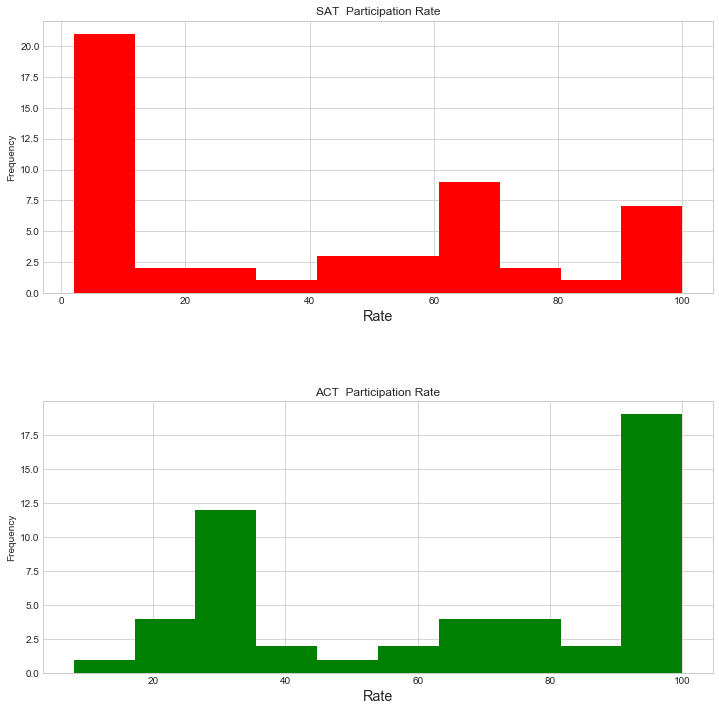

In [215]:
#plotting using pandas plotting
fig, ax = plt.subplots(nrows=2,figsize=(12,12))
plt.subplots_adjust(hspace=0.4)
ax[0].set_xlabel('Rate',size='x-large')
ax[1].set_xlabel('Rate',size='x-large')
stnd_test_nosd['Participation_SAT'].plot(ax=ax[0], kind = 'hist', color='r', title='SAT  Participation Rate',fontsize='medium')
stnd_test_nosd['Participation_ACT'].plot(ax=ax[1], kind = 'hist', color='g', title='ACT  Participation Rate',fontsize='medium');

##### 17. Plot the Math(s) distributions from both data sets.

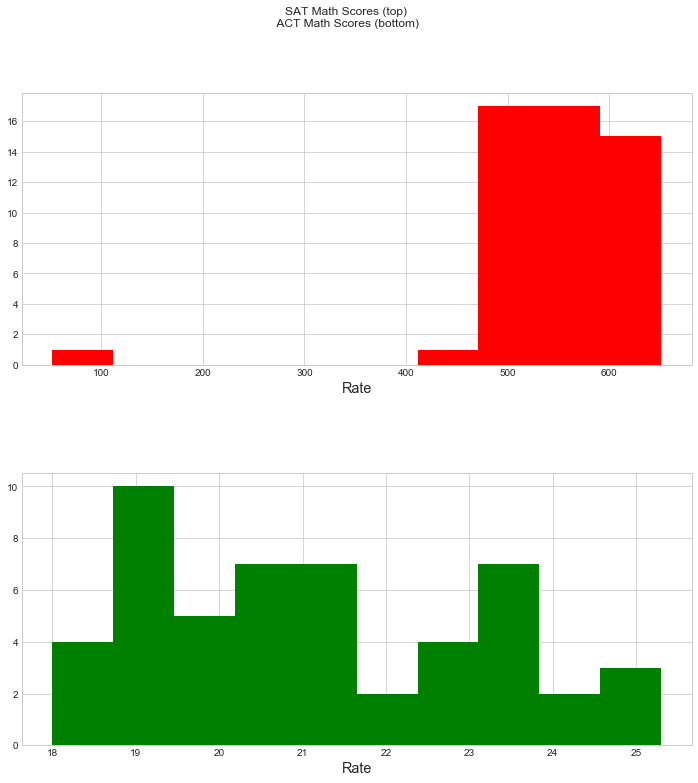

In [216]:

#plotting using matplotlib
fig, ax = plt.subplots(2,figsize=(12,12))
plt.subplots_adjust(hspace=0.4)
ax[0].set_xlabel('Rate',size='x-large')
#Using .suptitle() because in the form I am using I couldn't find how to specify individual titles.
plt.suptitle('SAT Math Scores (top)\n ACT Math Scores (bottom)')
ax[1].set_xlabel('Rate',size='x-large')
ax[0].hist(stnd_test_nosd['Math_SAT'],color='r')
ax[1].hist(stnd_test_nosd['Math_ACT'],color='g');

##### 18. Plot the Verbal distributions from both data sets.

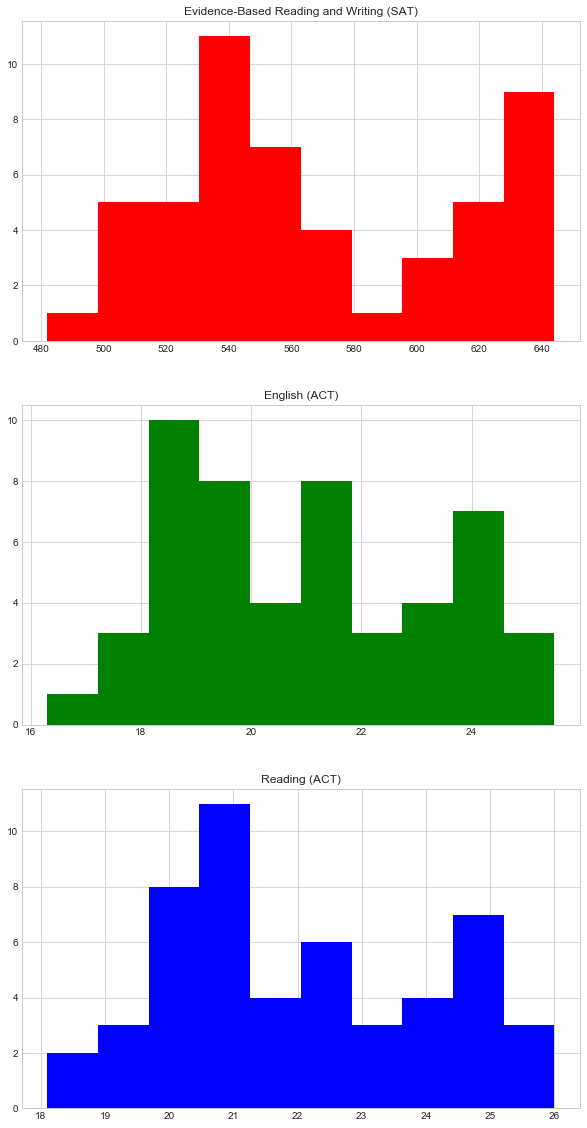

In [217]:
plt.figure(figsize=(10,20))
plt.subplot(311)
plt.hist(stnd_test_nosd['Evidence-Based Reading and Writing'],color='r')
plt.title('Evidence-Based Reading and Writing (SAT)')
plt.subplot(312)
plt.title('English (ACT)')
plt.hist(stnd_test_nosd['English'],color='g')
plt.subplot(313)
plt.title('Reading (ACT)')
plt.hist(stnd_test_nosd['Reading'],color='b');

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

We assume that the random variable in question is distributed normally (or approximately normal)

##### 20. Does this assumption hold true for any of our columns? Which?

,Participation_SAT,Evidence-Based Reading and Writing,Math_SAT,Total,Participation_ACT,English,Math_ACT,Reading,Science,Composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,547.627451,1126.098039,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608
std,35.276632,45.666901,84.909119,92.494812,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695
min,2.000000,482.000000,52.000000,950.000000,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,4.000000,533.500000,522.000000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


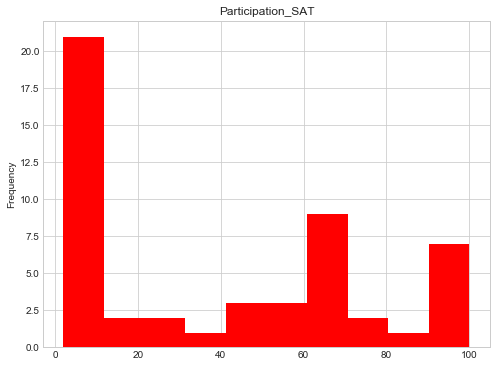

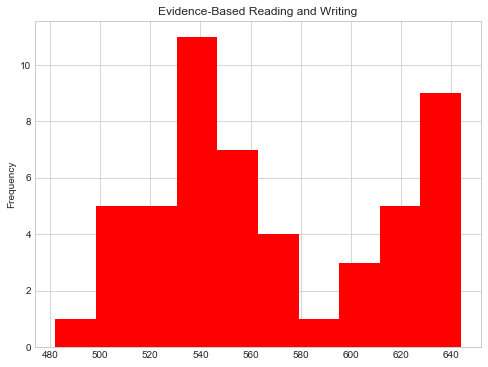

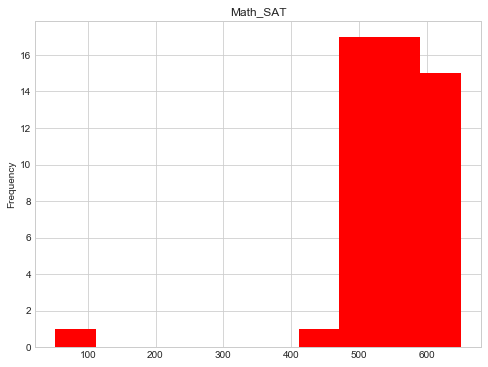

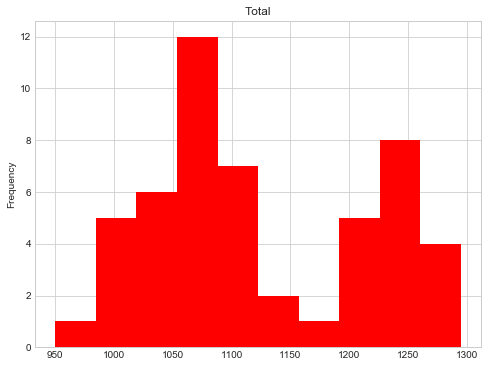

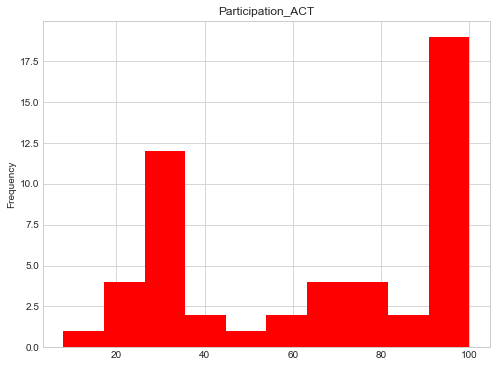

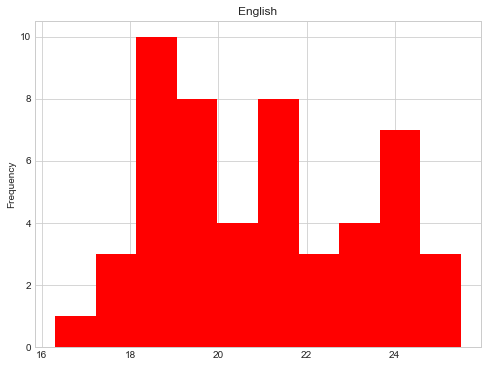

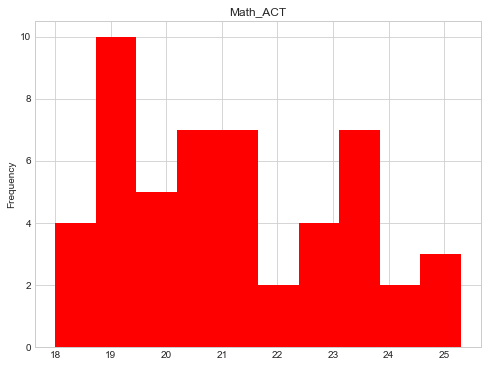

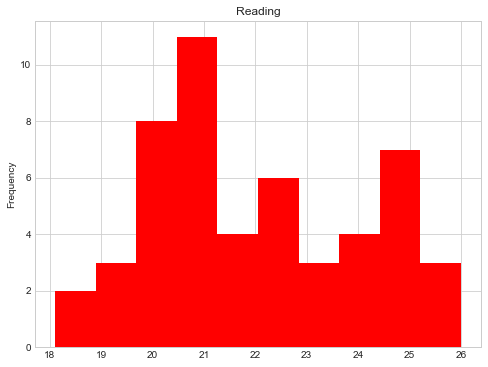

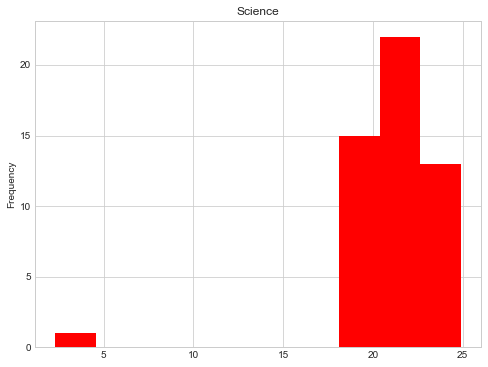

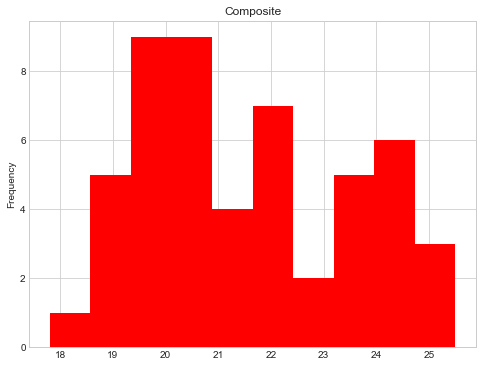

In [218]:
#Plotting all the columns as histograms and showing statistical values of the distribution
for i in stnd_test_nosd.columns[1:]:
    plt.figure(i,figsize=(8,6))
    stnd_test_nosd[i].plot(kind = 'hist', color='r', title=i,fontsize='medium')
stnd_test_nosd.describe()

Based on the above histograms and statistical data, Evidence-Based Reading and Writing, ACT English, and ACT Composite were somewhat normal because their median lies relatively close to actually between the maximum and minimum. Some are more normal than others like the fact that the ACT science data has a large left skew compared to something like the ACT composite which is more normal, albeit not particularly the most normal on its own.

##### 21. Plot some scatterplots examining relationships between all variables.

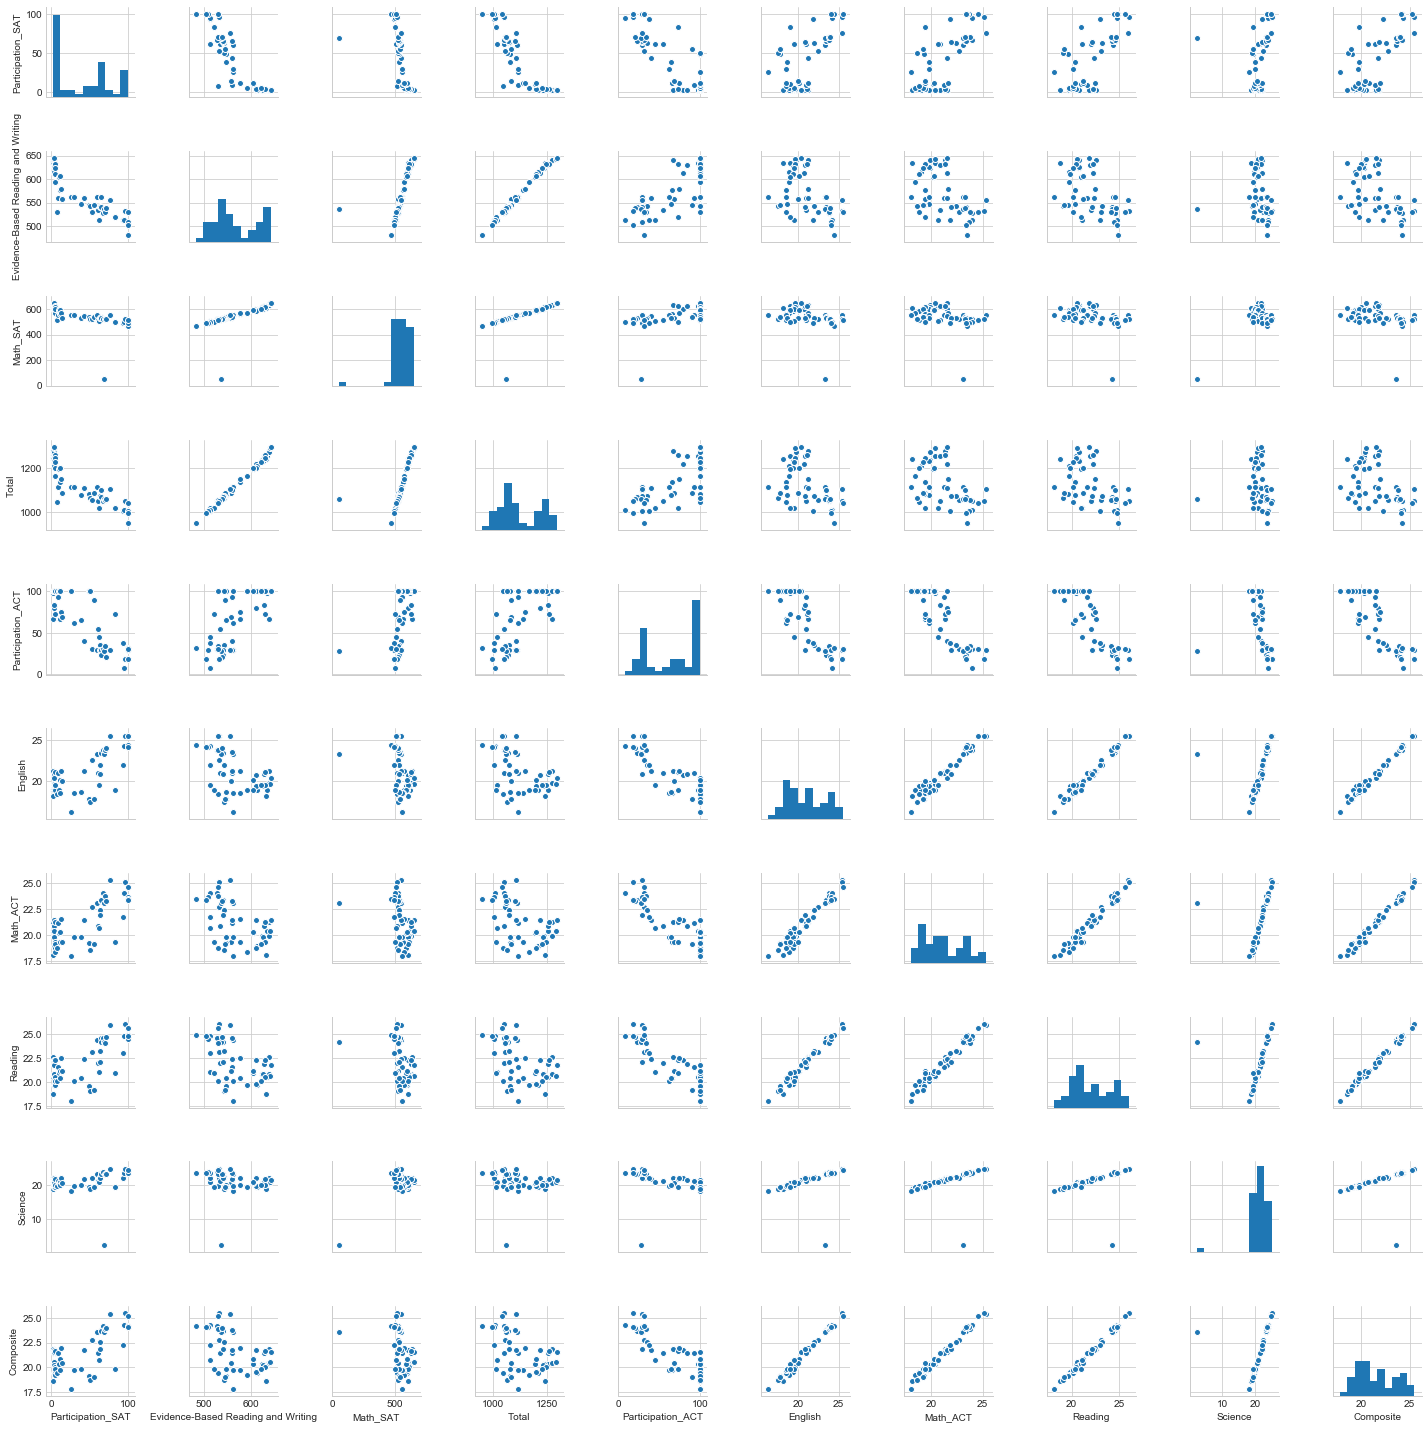

In [219]:
#Doing a pairplot to look at all possible potential correlations
sns.pairplot(stnd_test_nosd, size=2, palette='blues')

##### 22. Are there any interesting relationships to note?

Yes there were several.

##### 23. Create box plots for each variable. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1ac6229550>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac646f048>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac5a5a0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac627c7b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac6223b00>],
 'means': []}

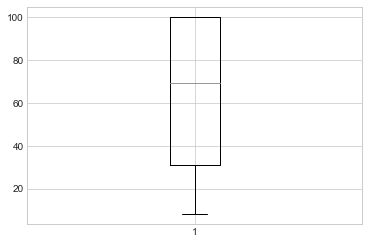

In [220]:
#Plotting
plt.boxplot(stnd_test_nosd['Participation_ACT'])

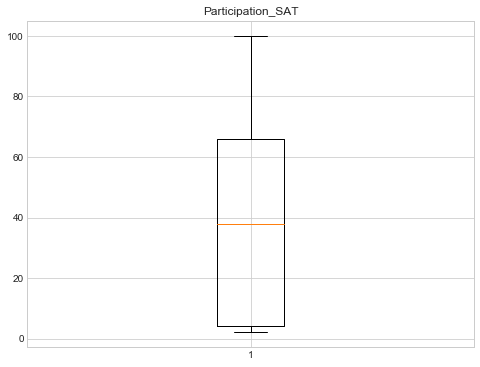

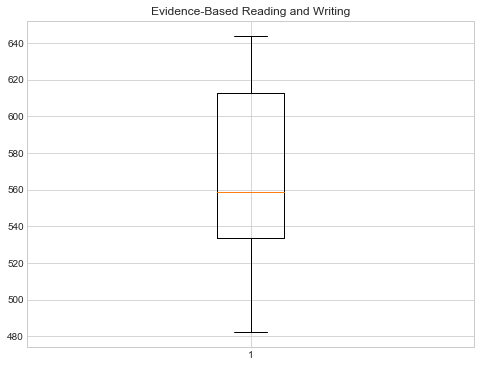

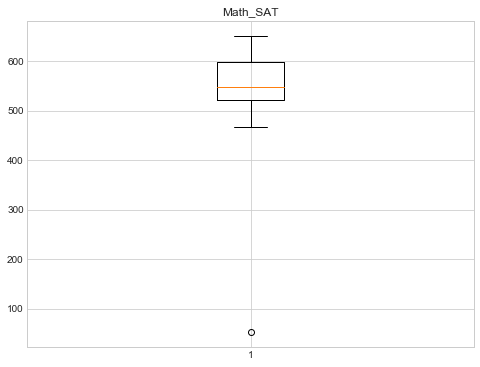

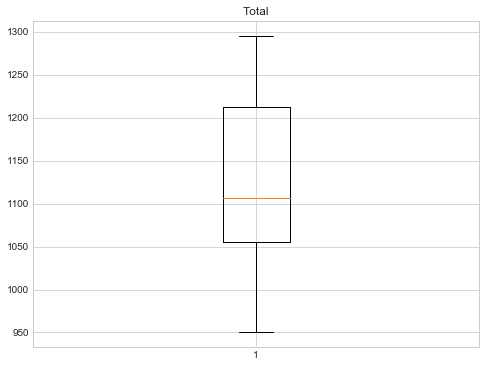

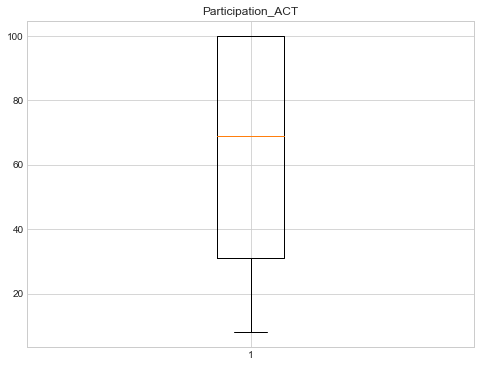

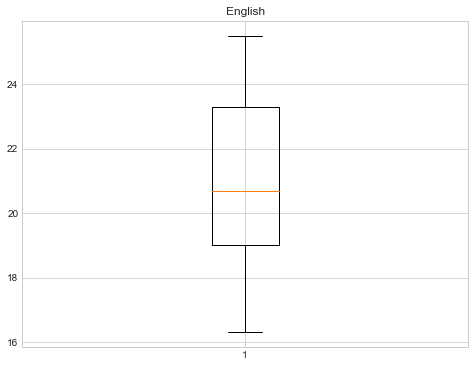

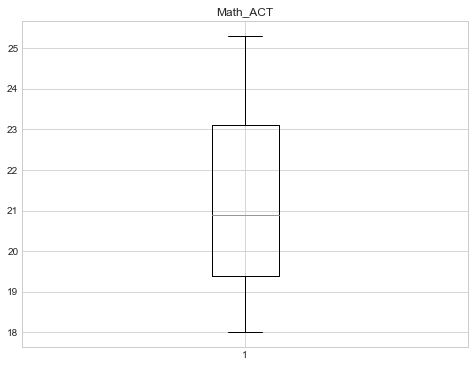

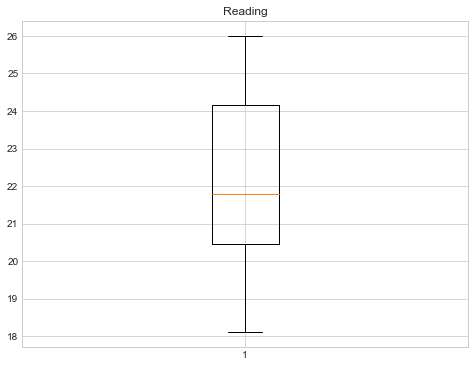

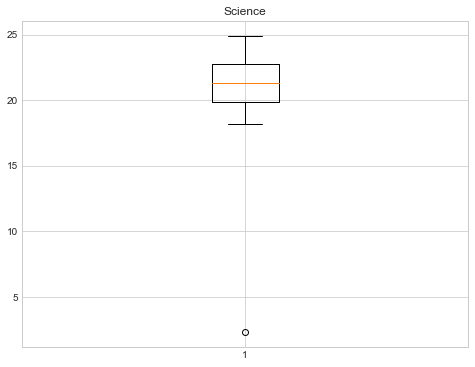

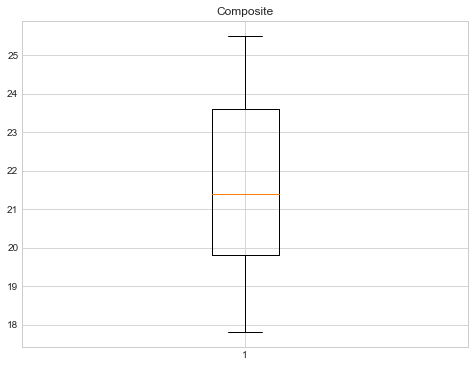

In [221]:
for i in stnd_test_nosd.columns[1:]:
    plt.figure(i,figsize=(8,6))
    plt.title(i)
    plt.boxplot(stnd_test_nosd[i])

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

In [241]:
%%html
<div class='tableauPlaceholder' id='viz1533912978105' style='position: relative'><noscript><a href='#'><img alt='Dashboard 3 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;SA&#47;SATHEATMAP&#47;Dashboard3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='SATHEATMAP&#47;Dashboard3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;SA&#47;SATHEATMAP&#47;Dashboard3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1533912978105');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [242]:
%%html
<div class='tableauPlaceholder' id='viz1533913024624' style='position: relative'><noscript><a href='#'><img alt='Dashboard 2 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;AC&#47;ACTHEATMAP&#47;Dashboard2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='ACTHEATMAP&#47;Dashboard2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;AC&#47;ACTHEATMAP&#47;Dashboard2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1533913024624');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

### SAT:
#####    -  Participation: was right skewed by quite a bit (as seen in the histogram below). It also had a reasonably large standard deviation at 35.27 and a mean of 39.803/median of 38.00, which shows the left bias mentioned before
    
##### - Evidence-Based Reading and Writing: didn't show a particularly strong skew partially because the standard deviation and sample size weren't that big. From the statistical characteristics it can be seen that the median and mean (559 and 569.12 respectively) are fairly close to the centerpoint of the max and minimum, perhaps indicating a possibly more normal distribution.
    
##### - SAT Math: more left skewed because the mean (547.63)/median (548) is far closer to the max (651) than the min (52)
    
##### - Total: slightly right skewed but more normal because the mean (1126.09)/median (1107) are slightly closer to the minimum than maximum but only by a small amount so the distribution is close to normal.
    
### ACT:
##### - Participation: more left skewed because the mean (65.25)/median (69) are closer to the maximum (100) than the minimum (8)

##### - English: approximately normal because the difference between the mean (20.93)/median (20.7) are roughly equidistant from the minimum (16.3) and maximum (25.5)

##### - ATC Math: more right skewed becuase the mean (21.18)/median (20.90) are closer to the minimum (18.00) than the maximum (25.30)

##### - Reading: slightly right skewed but approximately normal becuase the mean (22.01)/median (21.8) are basically equidistant to the minimum (18.10) and the maximum (26)

##### - Science: more left skewed becuase the mean (21.04)/median (22.75) are closer to the maximum (24.90) than the minimum (2.3)

##### - Composite: approximately normal becuase the mean (21.52)/median (21.4) are roughly equidistant to the minimum (17.8) and the maximum (25.5)

,Participation_SAT,Evidence-Based Reading and Writing,Math_SAT,Total,Participation_ACT,English,Math_ACT,Reading,Science,Composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,547.627451,1126.098039,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608
std,35.276632,45.666901,84.909119,92.494812,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695
min,2.000000,482.000000,52.000000,950.000000,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,4.000000,533.500000,522.000000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


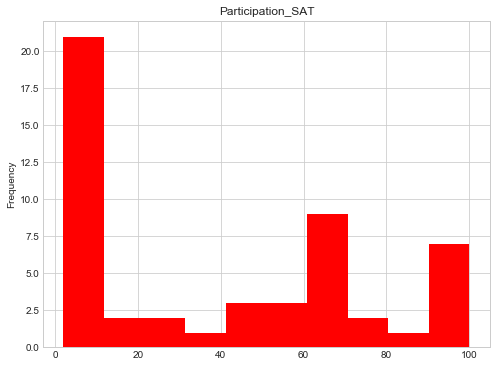

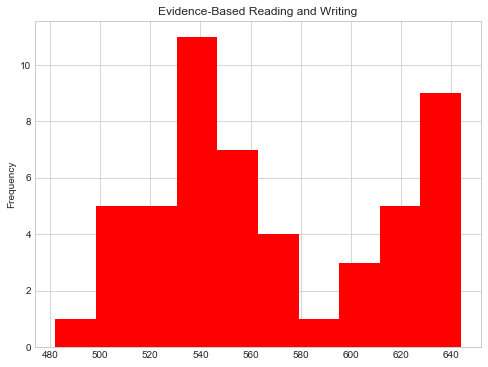

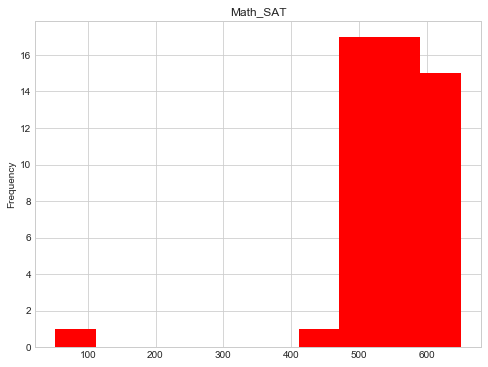

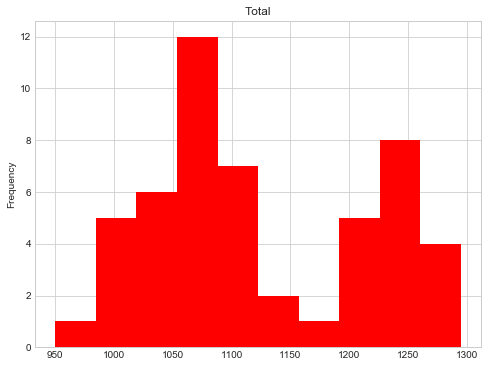

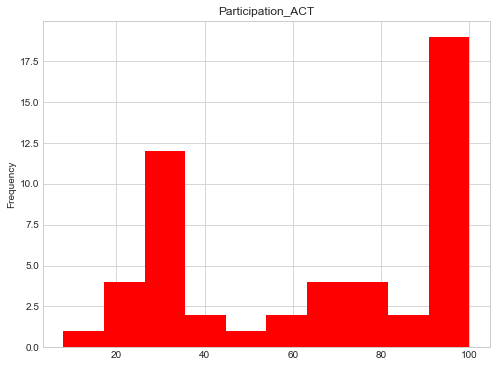

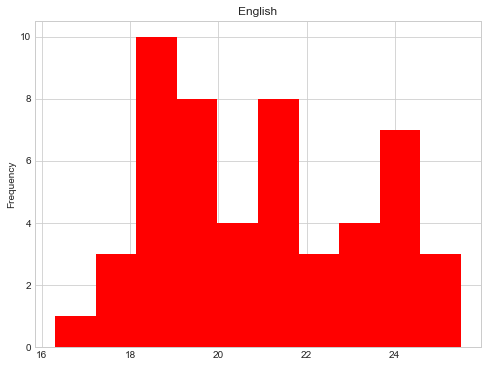

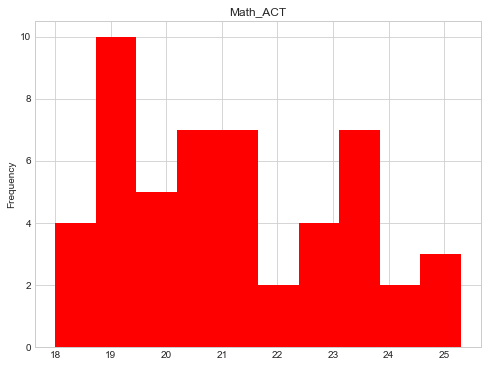

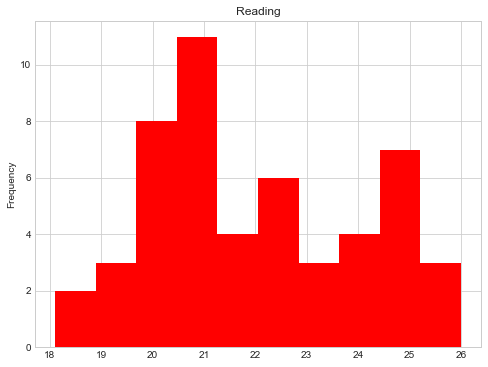

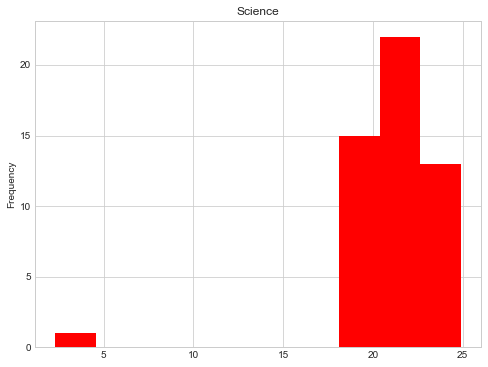

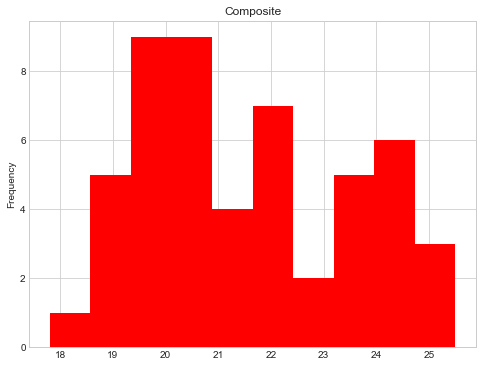

In [230]:
#Statistics and distributions
for i in stnd_test_nosd.columns[1:]:
    plt.figure(i,figsize=(8,6))
    stnd_test_nosd[i].plot(kind = 'hist', color='r', title=i,fontsize='medium')
stnd_test_stats=stnd_test_nosd.describe()
stnd_test_stats

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

For each exam specifically, basically across the board it can be seen that the scores on each section are all
positively correlated. This makes sense because People who score higher on one are probably more likely to score 
higher on the others because they are smarter/more prepared.
However, the ACT and SAT participation show a slight nigative correlation with the scores. This could mean that the
higher scores are a result of less people taking the exam and of those people there were more people who specifically
prepared and prepared more. 
Between exams there wasn't really a largely noticable correlation other than I noticed for many states the ACT Participation rate was higher than that of the SAT.

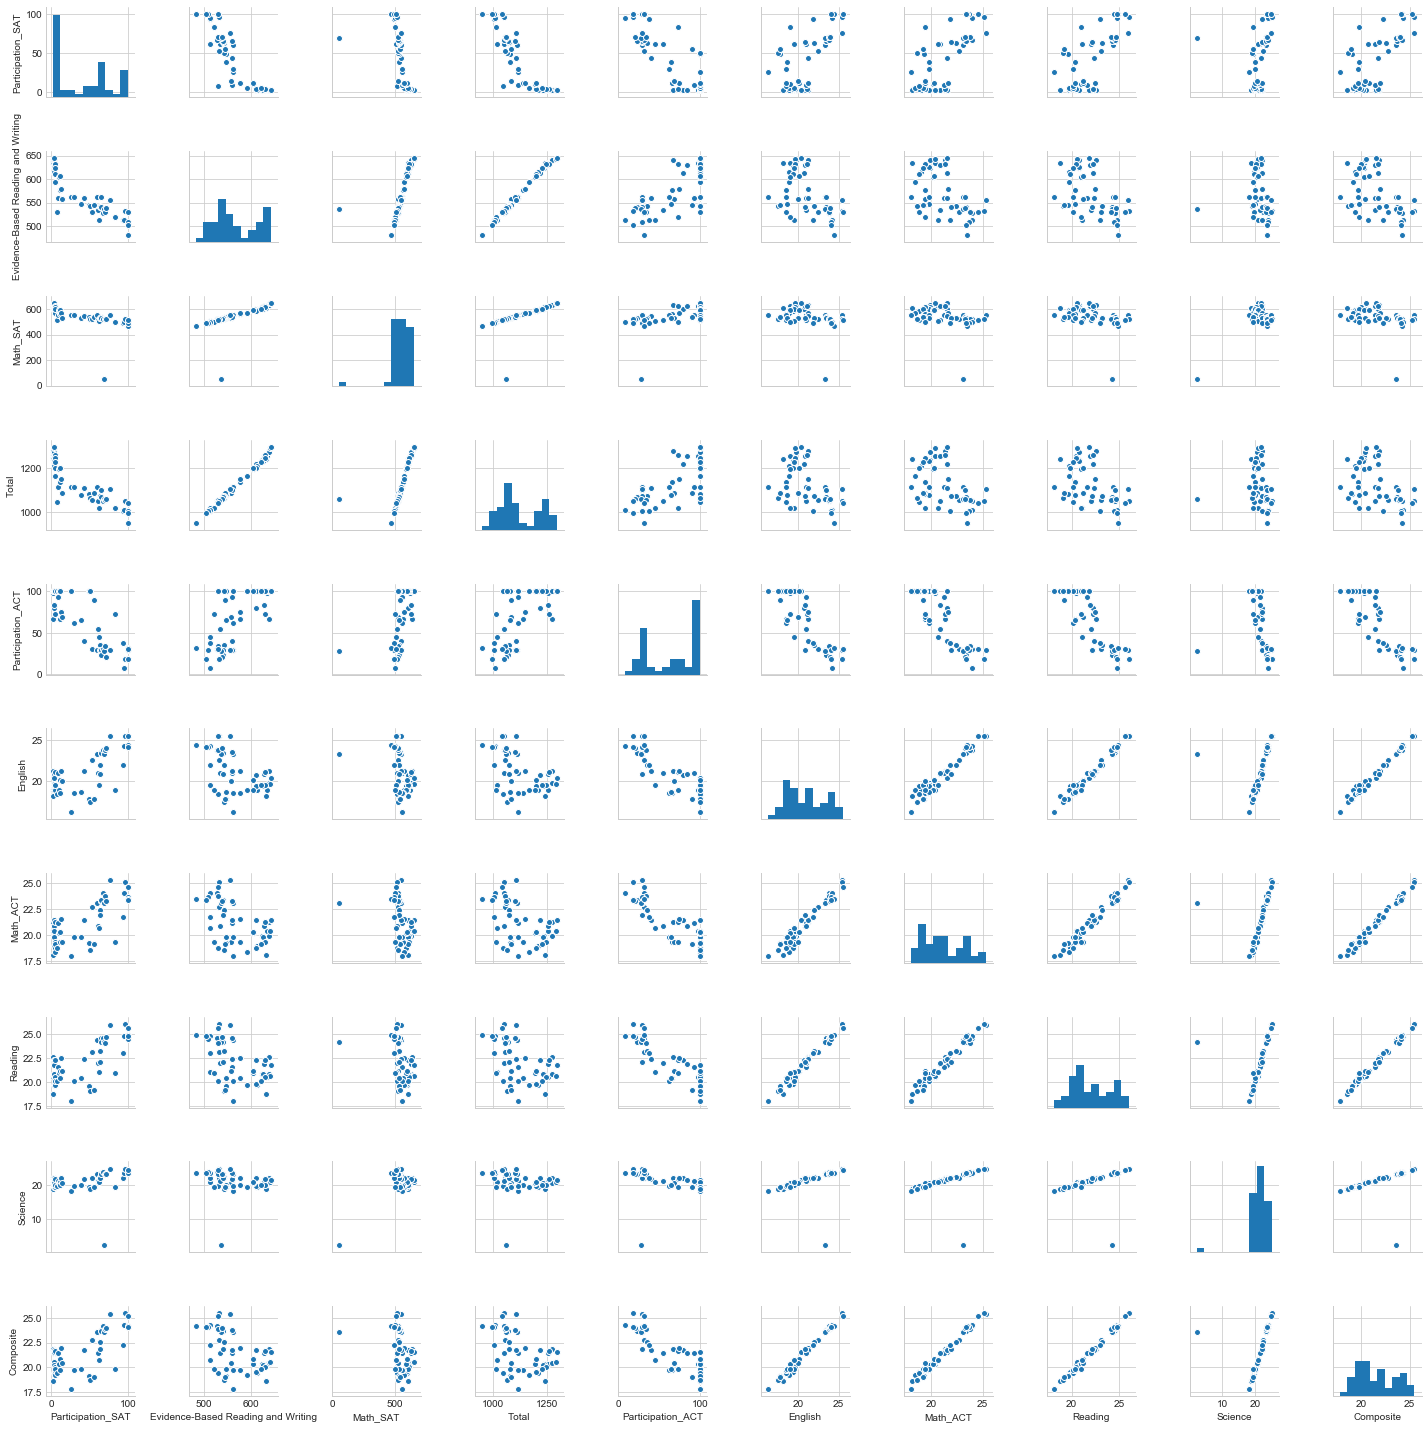

In [223]:
#Showing all scatter plots
sns.pairplot(stnd_test_nosd, size=2, palette='blues')

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

H0: There are the same amount of people taking the SAT and ACT
H1: There are more people taking the ACT

p-value=0.00024134203698662353<0.05 therefore there is evidence to reject the null hypothesis i.e. there is evidence that ACT participation rates are higher than SAT participation rates.


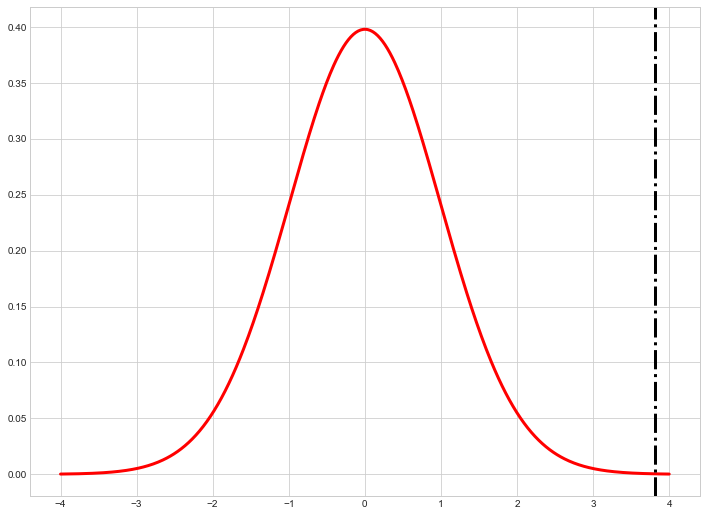

In [224]:
#Calculating T test
t_stat, p_value=stats.ttest_ind(stnd_test_nosd['Participation_ACT'],stnd_test_nosd['Participation_SAT'])
if p_value<0.05:
    print(f'p-value={p_value}<0.05 therefore there is evidence to reject the null hypothesis i.e. there is evidence that ACT participation rates are higher than SAT participation rates.')
# Generate points
xpoints = np.linspace(-4, 4, 500)
ypoints = stats.t.pdf(xpoints, (50+50-2), 0, 1)

# Initialize "figure."
fig = plt.figure(figsize=(12,9))

#Get axis
ax = fig.gca()

# Plotting
ax.plot(xpoints, ypoints, linewidth=3, color='red')

# Plot a vertical line for our measured t-statistic.
ax.axvline(t_stat, color='black', linestyle='-.', lw=3);

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

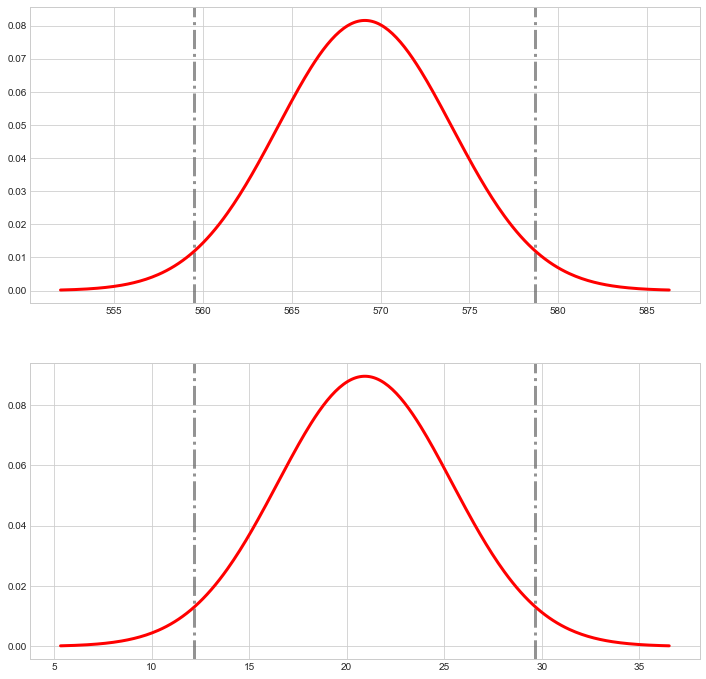

In [240]:
#Calculating SE and CI
standard_error_SAT=(stnd_test.loc['Standard Deviation'][1])/np.sqrt(len(stnd_test_nosd.index))
standard_error_ACT=(stnd_test.loc['Standard Deviation'][5])/np.sqrt(len(stnd_test_nosd.index))
meann=stnd_test_stats.loc['mean']
ci_lower_SAT=meann[1]-(1.96*standard_error_SAT)
ci_lower_ACT=meann[5]-(1.96*standard_error_ACT)
ci_upper_SAT=meann[1]+(1.96*standard_error_SAT)
ci_upper_ACT=meann[5]+(1.96*standard_error_ACT)

#Generating plots
fig = plt.figure(figsize=(12,12))
ax = fig.gca()

zxS = np.linspace(meann[1]-3.5*standard_error_SAT, meann[1]+3.5*standard_error_SAT, 300)
ZS = stats.norm(meann[1], standard_error_SAT)
zyS = ZS.pdf(zxS)

zxA = np.linspace(meann[5]-3.5*standard_error_ACT, meann[5]+3.5*standard_error_ACT, 300)
ZA = stats.norm(meann[5], standard_error_ACT)
zyA = ZA.pdf(zxA)

plt.subplot(211)
plt.axvline(ci_lower_SAT, ls='-.', lw=3, color='#666666', alpha=0.7)
plt.axvline(ci_upper_SAT, ls='-.', lw=3, color='#666666', alpha=0.7)
plt.plot(zxS, zyS, linewidth=3, color='red')

plt.subplot(212)
plt.axvline(ci_lower_ACT, ls='-.', lw=3, color='#666666', alpha=0.7)
plt.axvline(ci_upper_ACT, ls='-.', lw=3, color='#666666', alpha=0.7)
plt.plot(zxA, zyA, linewidth=3, color='red')

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

No because our p-value was below our given level of significanxxce 0.05.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

No because you don't know how many people took both, and participation likely takes a factor into the scores.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

No, because our sample set is only for 2017 and also each point of data is an average across an entire state. States differ vastly in population depending on which state it is syo the distributions of each state individually could show a different story.